In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Downloading NTLK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Setting random seed to 0 for reproducibility
np.random.seed(0)

In [6]:
# Loading the excel spreadsheet dataset and printing first 5 entries
path = "factoryReports.xlsx"
df = pd.read_excel(path)
print(df.head())

                                         Description            Category  \
0  Items are occasionally getting stuck in the sc...  Mechanical Failure   
1  Loud rattling and banging sounds are coming fr...  Mechanical Failure   
2  There are cuts to the power when starting the ...  Electronic Failure   
3                 Fried capacitors in the assembler.  Electronic Failure   
4                           Mixer tripped the fuses.  Electronic Failure   

  Urgency          Resolution   Cost  
0  Medium    Readjust Machine     45  
1  Medium    Readjust Machine     35  
2    High    Full Replacement  16200  
3    High  Replace Components    352  
4     Low   Add to Watch List     55  


In [7]:
# Function to preproccess the data and tokenize all words converting them to lower case.
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    return ' '.join([word for word in words if word.isalnum() and word not in stop_words])

df['Processed_Description'] = df['Description'].astype(str).apply(preprocess_text)

In [8]:
# Applying TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Description'])
y = df['Category'] 

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Training a random forest classifier and fitting the model along with making predictions
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [10]:
# Computing and printing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9062


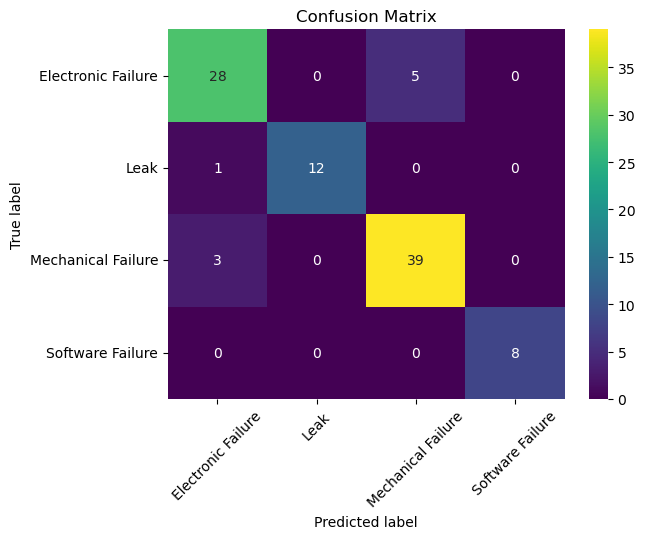

In [19]:
# Plotting the confusion matrix
labels = ['Electronic Failure', 'Leak', 'Mechanical Failure', 'Software Failure']
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Report

### Which techniques would you use for keyword normalization in NLP, the process of converting a keyword into its base form? 
Ans. Techniques for keyword normalization in NLP are:
   - Lemmatization: Converts words to their base form (e.g., 'running' -> 'run').
   - Stemming: Trims words to their root form (e.g., 'running' -> 'runn').

### 2. What is TF-IDF in NLP? 
Ans. TF-IDF (Term Frequency-Inverse Document Frequency) in NLP measures the importance of words in a document relative to a corpus. It helps filter out common words and highlights significant terms.

### 3. What are some alternatives for TF-IDF method to parse text data? 
Ans. Alternatives to TF-IDF for parsing text data are:
   - Count Vectorization
   - Word2Vec
   - BERT embeddings
   - FastText

### 4. What advantage(s) does word2vec has over TF-IDF? 
Ans. Advantages of Word2Vec over TF-IDF are:
   - Captures semantic meaning by learning word relationships.
   - Reduces high-dimensional sparse representation in TF-IDF to dense word embeddings.
   
### 5. Provide two applications of the above lab assignment problem. 
Ans. Possible applications of this lab problem can be:
   - Categorizing customer service complaints into predefined topics.
   - Automating email classification (say, spam vs. important emails).